In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head().T

,0,1,2,3,4
employee_id,65438,65141,7513,2542,48945
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
previous_year_rating,5,5,3,1,3
length_of_service,8,4,7,10,2


# EDA

In [54]:
#EDA
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Text(0.5, 0.98, 'Numerical Variables')

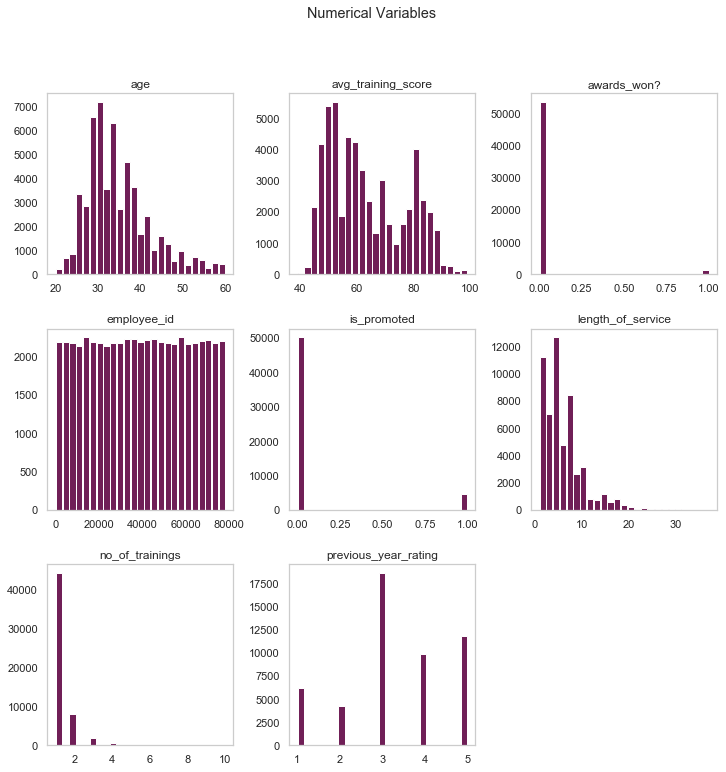

In [55]:
#numerical variables including target

ax = train.hist(bins=25, grid=False, figsize=(12,12),color='#701F57',zorder=2, rwidth=0.9)
plt.suptitle("Numerical Variables")

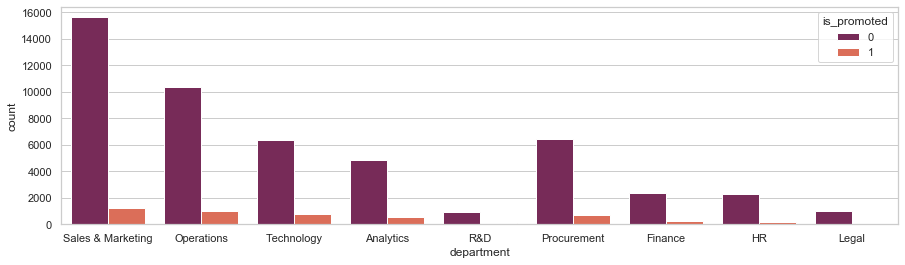

In [56]:
# categorical features - department
plt.figure(figsize=(15,4))
ax = sns.countplot(x="department",data=train, palette="rocket",hue="is_promoted")
sns.set(style="whitegrid")
plt.show()

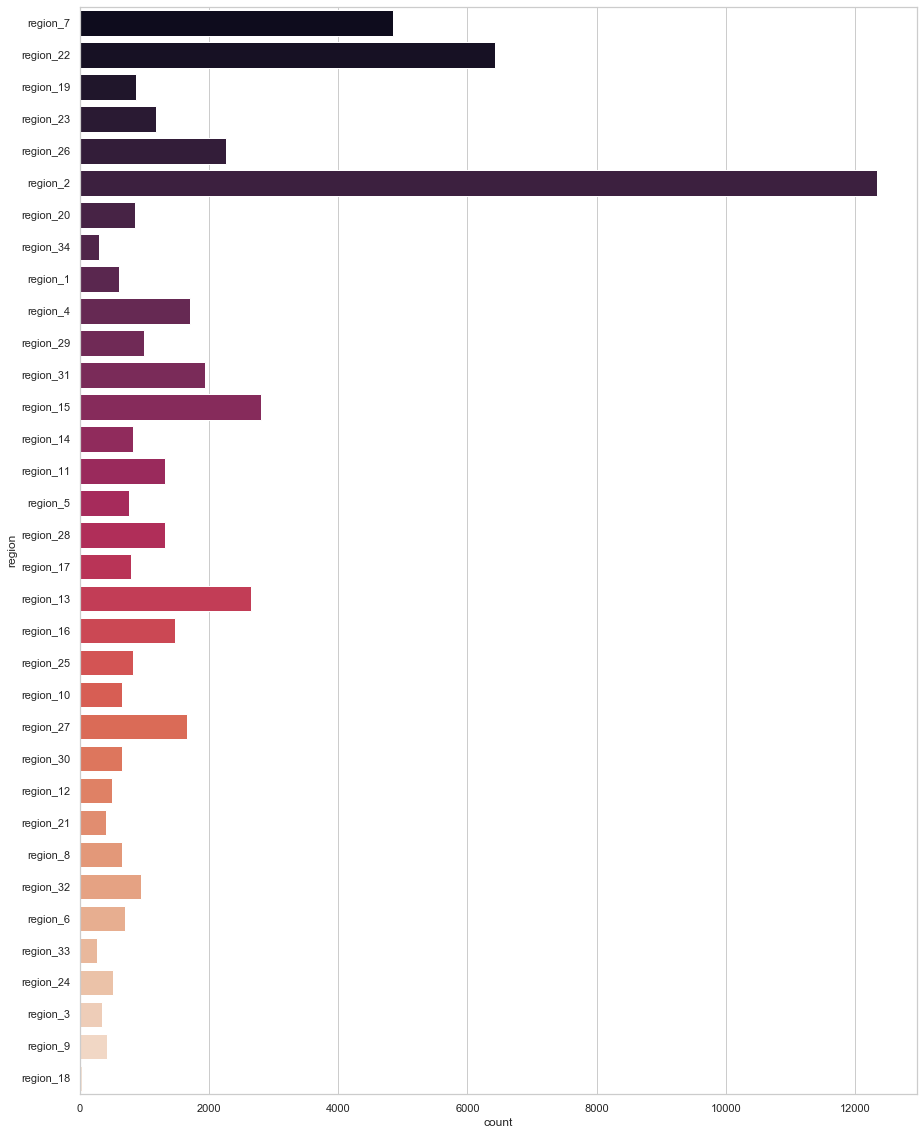

In [57]:
# categorical features - region
plt.figure(figsize=(15,20))
ax = sns.countplot(y="region",data=train, palette="rocket")
sns.set(style="whitegrid")
plt.show()

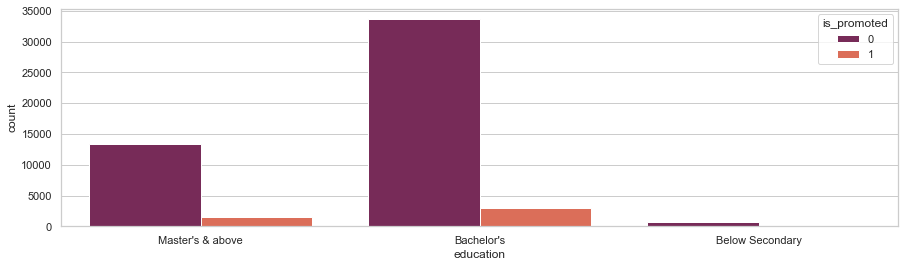

In [58]:
# categorical features - education
plt.figure(figsize=(15,4))
ax = sns.countplot(x="education",data=train, palette="rocket",hue="is_promoted")
sns.set(style="whitegrid")
plt.show()

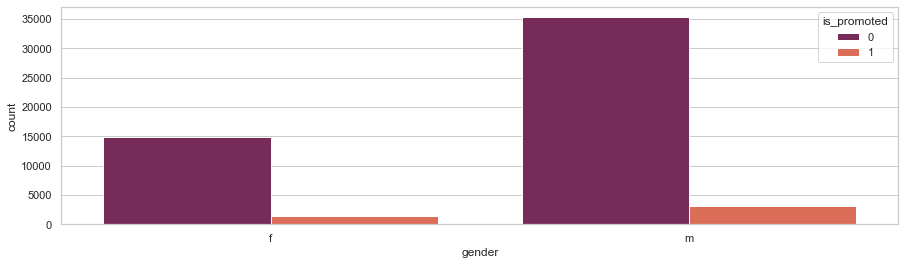

In [59]:
# categorical features - gender
plt.figure(figsize=(15,4))
ax = sns.countplot(x="gender",data=train, palette="rocket",hue="is_promoted")
sns.set(style="whitegrid")
plt.show()

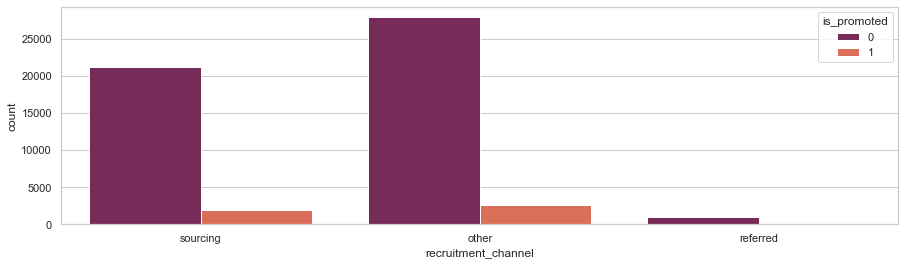

In [60]:
# categorical features - recruitment_channel
plt.figure(figsize=(15,4))
ax = sns.countplot(x="recruitment_channel",data=train, palette="rocket",hue="is_promoted")
sns.set(style="whitegrid")
plt.show()

# Preprocessing

In [61]:
#merge train and test for preprocessing
df = train
df = df.append(test)
df.shape

(78298, 13)

In [62]:
# region - count unique values
df.region.nunique()

34

In [63]:
# region - checking %
df.region.value_counts(normalize=True) 

region_2     0.225319
region_22    0.117078
region_7     0.087167
region_15    0.050295
region_13    0.048724
region_26    0.041776
region_31    0.035493
region_4     0.031648
region_27    0.030256
region_16    0.026246
region_28    0.024432
region_11    0.024087
region_23    0.021597
region_29    0.017983
region_32    0.017599
region_19    0.016399
region_14    0.015032
region_20    0.015020
region_17    0.014777
region_25    0.014764
region_5     0.014151
region_6     0.012618
region_30    0.011878
region_8     0.011801
region_10    0.011712
region_1     0.010830
region_24    0.009285
region_12    0.009132
region_9     0.007663
region_21    0.007535
region_3     0.006296
region_34    0.005709
region_33    0.005045
region_18    0.000651
Name: region, dtype: float64

In [64]:
# list top 10
top_10 = [x for x in df.region.value_counts().head(10).index]
top_10

['region_2',
 'region_22',
 'region_7',
 'region_15',
 'region_13',
 'region_26',
 'region_31',
 'region_4',
 'region_27',
 'region_16']

In [65]:
#one hot enconding

for region in top_10:
    df[region] = np.where(df['region']==region,1,0)

df[['region']+top_10].head()

,region,region_2,region_22,region_7,region_15,region_13,region_26,region_31,region_4,region_27,region_16
0,region_7,0,0,1,0,0,0,0,0,0,0
1,region_22,0,1,0,0,0,0,0,0,0,0
2,region_19,0,0,0,0,0,0,0,0,0,0
3,region_23,0,0,0,0,0,0,0,0,0,0
4,region_26,0,0,0,0,0,1,0,0,0,0


In [66]:
#drop region
df.drop(columns=['region'],inplace=True)

## Missing Values

In [67]:
#checking missing values
print("Education NA: ",(df.education.isna().sum()/len(df))*100)
print("Previous Year Rating NA: ",(df.previous_year_rating.isna().sum()/len(df))*100)

Education NA:  4.397302613093566
Previous Year Rating NA:  7.581291987023935


In [68]:
df.education.value_counts(normalize=True,dropna=False)

Bachelor's          0.667284
Master's & above    0.273685
NaN                 0.043973
Below Secondary     0.015058
Name: education, dtype: float64

In [69]:
df.education.value_counts(normalize=True)

Bachelor's          0.697976
Master's & above    0.286273
Below Secondary     0.015750
Name: education, dtype: float64

In [70]:
#treating na as a new category called missing
df['education'] = df['education'].fillna('Missing')
df.education.value_counts(normalize=True,dropna=False)

Bachelor's          0.667284
Master's & above    0.273685
Missing             0.043973
Below Secondary     0.015058
Name: education, dtype: float64

In [71]:
df.previous_year_rating.value_counts(normalize=True,dropna=False)

3.0    0.338949
5.0    0.215050
4.0    0.180413
1.0    0.113707
2.0    0.076068
NaN    0.075813
Name: previous_year_rating, dtype: float64

In [72]:
df.previous_year_rating.value_counts(normalize=True)

3.0    0.366753
5.0    0.232691
4.0    0.195213
1.0    0.123034
2.0    0.082308
Name: previous_year_rating, dtype: float64

In [73]:
df.previous_year_rating.median()

3.0

In [74]:
#replace missing value with median
df['previous_year_rating'] = df['previous_year_rating'].fillna(3.0)
df.previous_year_rating.value_counts(normalize=True,dropna=False)

3.0    0.414762
5.0    0.215050
4.0    0.180413
1.0    0.113707
2.0    0.076068
Name: previous_year_rating, dtype: float64

## One Hot Encoder

In [75]:
#onehotencoder -> cat features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(df[['department','education','gender','recruitment_channel']]).toarray()
ohe_arr

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [76]:
#creating a df
ohe_labels = ohe.get_feature_names(['department','education','gender','recruitment_channel'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [77]:
#drop columns
df.drop(columns= ['department','education','gender','recruitment_channel'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   no_of_trainings       78298 non-null  int64  
 2   age                   78298 non-null  int64  
 3   previous_year_rating  78298 non-null  float64
 4   length_of_service     78298 non-null  int64  
 5   awards_won?           78298 non-null  int64  
 6   avg_training_score    78298 non-null  int64  
 7   is_promoted           54808 non-null  float64
 8   region_2              78298 non-null  int64  
 9   region_22             78298 non-null  int64  
 10  region_7              78298 non-null  int64  
 11  region_15             78298 non-null  int64  
 12  region_13             78298 non-null  int64  
 13  region_26             78298 non-null  int64  
 14  region_31             78298 non-null  int64  
 15  region_4           

In [78]:
#concat dfs
df = pd.concat([df,ohe_df],axis=1,join='inner')
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   no_of_trainings               78298 non-null  int64  
 2   age                           78298 non-null  int64  
 3   previous_year_rating          78298 non-null  float64
 4   length_of_service             78298 non-null  int64  
 5   awards_won?                   78298 non-null  int64  
 6   avg_training_score            78298 non-null  int64  
 7   is_promoted                   54808 non-null  float64
 8   region_2                      78298 non-null  int64  
 9   region_22                     78298 non-null  int64  
 10  region_7                      78298 non-null  int64  
 11  region_15                     78298 non-null  int64  
 12  region_13                     78298 non-null  int64  
 13  r

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']] = scaler.fit_transform(df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']])
df.head().T

,0,1,2,3,4
employee_id,65438.000000,65141.000000,7513.000000,2542.000000,48945.000000
no_of_trainings,0.000000,0.000000,0.000000,0.111111,0.000000
age,0.375000,0.250000,0.350000,0.475000,0.625000
previous_year_rating,1.000000,1.000000,0.500000,0.000000,0.500000
length_of_service,0.194444,0.083333,0.166667,0.250000,0.027778
awards_won?,0.000000,0.000000,0.000000,0.000000,0.000000
avg_training_score,0.166667,0.350000,0.183333,0.183333,0.566667
is_promoted,0.000000,0.000000,0.000000,0.000000,0.000000
region_2,0.000000,0.000000,0.000000,0.000000,0.000000
region_22,0.000000,1.000000,0.000000,0.000000,0.000000


In [80]:
#separate train and test datasets
train, test = df[~df['is_promoted'].isnull()], df[df['is_promoted'].isnull()]
train.shape, test.shape

((54808, 36), (23490, 36))

### Target

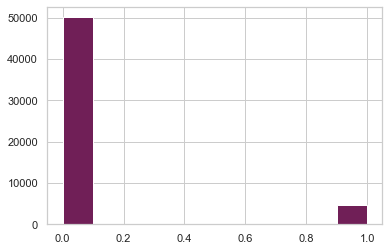

In [81]:
train.is_promoted.hist(color='#701F57')
plt.show()

In [82]:
train.is_promoted.value_counts(normalize=True)

0.0    0.91483
1.0    0.08517
Name: is_promoted, dtype: float64

In [83]:
train.is_promoted.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

### Random Seed

In [84]:
seed_value = 12321
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)

### Validation Data

In [85]:
train.drop(columns=['employee_id'],inplace=True)
train.columns

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted', 'region_2',
       'region_22', 'region_7', 'region_15', 'region_13', 'region_26',
       'region_31', 'region_4', 'region_27', 'region_16',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above',
       'education_Missing', 'gender_f', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [86]:
# train valid split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['is_promoted']),train['is_promoted'], test_size=0.3,random_state=seed_value)

In [87]:
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,region_2,region_22,region_7,region_15,...,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
26344,0.111111,0.325,1.00,0.166667,0.0,0.366667,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21538,0.000000,0.300,1.00,0.111111,0.0,0.383333,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15489,0.000000,0.825,0.25,0.222222,0.0,0.200000,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15565,0.000000,0.275,1.00,0.111111,0.0,0.116667,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
48575,0.000000,0.525,0.50,0.055556,0.0,0.816667,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [88]:
X_valid.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,region_2,region_22,region_7,region_15,...,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
52257,0.000000,0.475,0.25,0.083333,0.0,0.500000,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
19317,0.111111,0.275,0.75,0.250000,0.0,0.816667,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
28876,0.000000,1.000,0.00,0.083333,0.0,0.166667,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
29932,0.000000,0.275,0.75,0.055556,0.0,0.633333,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
35815,0.000000,0.775,1.00,0.111111,0.0,0.366667,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [89]:
#determine the mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.0007906 , 0.00215785, 0.01328223, 0.00126068, 0.00881293,
       0.03085234, 0.        , 0.        , 0.        , 0.00050771,
       0.00081981, 0.00079545, 0.00340555, 0.00037631, 0.        ,
       0.        , 0.00035565, 0.        , 0.        , 0.00280082,
       0.00049578, 0.        , 0.        , 0.00451392, 0.00123398,
       0.00207062, 0.00121885, 0.00206015, 0.        , 0.00012362,
       0.00435627, 0.00154721, 0.        , 0.        ])

In [90]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

avg_training_score              0.030852
previous_year_rating            0.013282
awards_won?                     0.008813
department_Sales & Marketing    0.004514
gender_m                        0.004356
region_31                       0.003406
department_Legal                0.002801
age                             0.002158
education_Bachelor's            0.002071
education_Master's & above      0.002060
recruitment_channel_other       0.001547
length_of_service               0.001261
department_Technology           0.001234
education_Below Secondary       0.001219
region_13                       0.000820
region_26                       0.000795
no_of_trainings                 0.000791
region_15                       0.000508
department_Operations           0.000496
region_4                        0.000376
department_Analytics            0.000356
gender_f                        0.000124
region_27                       0.000000
region_16                       0.000000
recruitment_chan

In [91]:
from sklearn.feature_selection import SelectKBest

select_top10 = SelectKBest(mutual_info_classif,k=10)
select_top10.fit(X_train,y_train)
X_train.columns[select_top10.get_support()]

Index(['previous_year_rating', 'awards_won?', 'avg_training_score',
       'region_22', 'region_26', 'region_4', 'department_Legal',
       'education_Bachelor's', 'gender_m', 'recruitment_channel_other'],
      dtype='object')

## Classification Models

In [92]:
#import modules

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [93]:
#defining learning classifiers

names = ["Nearest_Neighbors","RBF_SVM", "Decision_Tree", "Random_Forest","AdaBoost","Naive_Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=1, gamma=2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB()]
  

In [94]:
# calculating models scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_valid, y_valid)
    scores.append(score)

In [95]:
#dataframe models
models = pd.DataFrame()
models['name'] = names
models['score'] = scores
models.sort_values(by='score',ascending=False)

,name,score
4,AdaBoost,0.933345
2,Decision_Tree,0.930974
3,Random_Forest,0.925622
1,RBF_SVM,0.922399
0,Nearest_Neighbors,0.918020
5,Naive_Bayes,0.872225


In [96]:
pip install scikit-plot

You should consider upgrading via the '/Users/mac/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


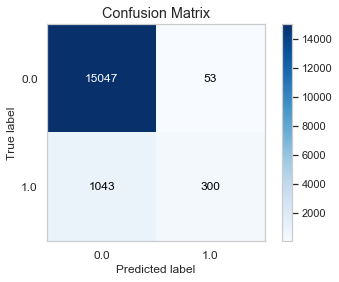

In [97]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import scikitplot as skplt

adc = AdaBoostClassifier(n_estimators=100)
adc.fit(X_train, y_train)
preds_valid = adc.predict(X_valid)
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)

## Desbalanced Target

In [98]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [99]:
#oversampling '1.0' - is_promoted

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros,y_ros= ros.fit_resample(X_train,y_train)
y_ros.value_counts()


1.0    35040
0.0    35040
Name: is_promoted, dtype: int64